In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | tieling
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | henties bay
Processing Record 6 of Set 1 | berbera
Processing Record 7 of Set 1 | adrar
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | san jose
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | alta floresta
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | issaquah
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | devonport
Processing Record 18 of Set 1 | dhidhdhoo
Processing Record 19 of Set 1 | morant bay
Processing Record 20 of Set 1 | wilkie
Processing Record 21 of Set 1 | marietta
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | hermanus
Pro

Processing Record 40 of Set 4 | sungai siput utara
City not found. Skipping...
Processing Record 41 of Set 4 | mogadishu
Processing Record 42 of Set 4 | san pedro de macoris
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | cabimas
Processing Record 46 of Set 4 | kutum
Processing Record 47 of Set 4 | clonakilty
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | puerto carreno
Processing Record 1 of Set 5 | dikson
Processing Record 2 of Set 5 | edd
Processing Record 3 of Set 5 | amderma
City not found. Skipping...
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | westport
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | x-can
City not found. Skipping...
Processing Record 9 of Set 5 | soavinandriana
Processing Record 10 of Set 5 | jiddah
City not found

City not found. Skipping...
Processing Record 22 of Set 8 | tateyama
Processing Record 23 of Set 8 | yulara
Processing Record 24 of Set 8 | nabire
Processing Record 25 of Set 8 | ust-kan
Processing Record 26 of Set 8 | shache
Processing Record 27 of Set 8 | pangnirtung
Processing Record 28 of Set 8 | chimbote
Processing Record 29 of Set 8 | faanui
Processing Record 30 of Set 8 | fallon
Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | kavieng
Processing Record 33 of Set 8 | quelimane
Processing Record 34 of Set 8 | shasta lake
Processing Record 35 of Set 8 | raxaul
Processing Record 36 of Set 8 | aguas belas
Processing Record 37 of Set 8 | avera
Processing Record 38 of Set 8 | kemijarvi
Processing Record 39 of Set 8 | aswan
Processing Record 40 of Set 8 | king city
Processing Record 41 of Set 8 | sain alto
Processing Record 42 of Set 8 | manjacaze
Processing Record 43 of Set 8 | port moresby
Processing Record 44 of Set 8 | marv dasht
City not found. Skipping

Processing Record 11 of Set 12 | parksville
Processing Record 12 of Set 12 | prokopyevsk
Processing Record 13 of Set 12 | atbasar
Processing Record 14 of Set 12 | yarmouth
Processing Record 15 of Set 12 | churapcha
Processing Record 16 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 12 | richards bay
Processing Record 18 of Set 12 | matara
Processing Record 19 of Set 12 | bloemhof
Processing Record 20 of Set 12 | kismayo
Processing Record 21 of Set 12 | bulalacao
Processing Record 22 of Set 12 | chenghai
Processing Record 23 of Set 12 | brunico
Processing Record 24 of Set 12 | hornepayne
Processing Record 25 of Set 12 | umea
Processing Record 26 of Set 12 | pedasi
Processing Record 27 of Set 12 | ruteng
Processing Record 28 of Set 12 | garowe
Processing Record 29 of Set 12 | carmo do paranaiba
Processing Record 30 of Set 12 | tura
Processing Record 31 of Set 12 | acapulco
Processing Record 32 of Set 12 | aykhal
Processing Record 33 of Set 12 |

In [12]:
len(city_data)

567

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,53.60,76,75,11.41,CL,2020-11-01 22:30:17
1,Tieling,42.29,123.84,33.76,73,0,8.52,CN,2020-11-01 22:30:18
2,Qaanaaq,77.48,-69.36,2.66,74,0,7.16,GL,2020-11-01 22:30:18
3,Anadyr,64.75,177.48,15.80,85,75,4.88,RU,2020-11-01 22:30:19
4,Henties Bay,-22.12,14.28,55.00,91,31,5.30,NA,2020-11-01 22:30:19
5,Berbera,10.44,45.01,79.07,65,0,6.11,SO,2020-11-01 22:30:20
6,Adrar,20.50,-10.07,79.90,17,100,9.46,MR,2020-11-01 22:30:20
7,Hithadhoo,-0.60,73.08,83.34,74,100,9.42,MV,2020-11-01 22:30:20
8,San Jose,37.34,-121.89,84.00,27,75,5.82,US,2020-11-01 22:27:07
9,Sitka,57.05,-135.33,46.40,87,90,5.82,US,2020-11-01 22:29:10


In [16]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-11-01 22:30:17,-53.15,-70.92,53.60,76,75,11.41
1,Tieling,CN,2020-11-01 22:30:18,42.29,123.84,33.76,73,0,8.52
2,Qaanaaq,GL,2020-11-01 22:30:18,77.48,-69.36,2.66,74,0,7.16
3,Anadyr,RU,2020-11-01 22:30:19,64.75,177.48,15.80,85,75,4.88
4,Henties Bay,NA,2020-11-01 22:30:19,-22.12,14.28,55.00,91,31,5.30
5,Berbera,SO,2020-11-01 22:30:20,10.44,45.01,79.07,65,0,6.11
6,Adrar,MR,2020-11-01 22:30:20,20.50,-10.07,79.90,17,100,9.46
7,Hithadhoo,MV,2020-11-01 22:30:20,-0.60,73.08,83.34,74,100,9.42
8,San Jose,US,2020-11-01 22:27:07,37.34,-121.89,84.00,27,75,5.82
9,Sitka,US,2020-11-01 22:29:10,57.05,-135.33,46.40,87,90,5.82


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
 # Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time

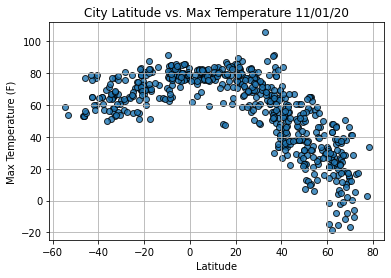

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

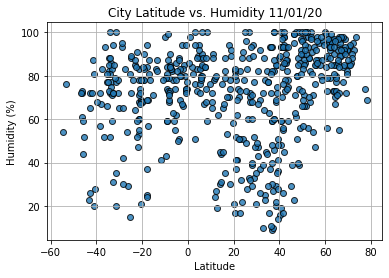

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

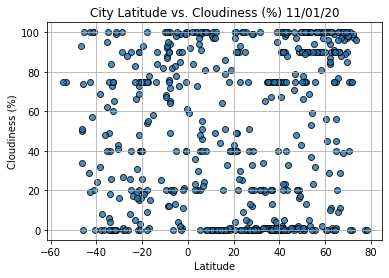

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

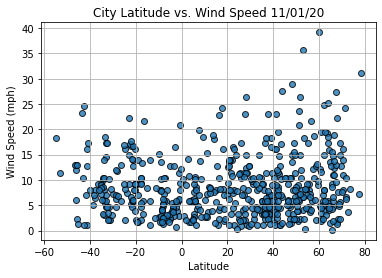

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()